<a href="https://colab.research.google.com/github/TemmytheDA/Profitability-Prediction-Using-Deep-Learning-and-Machine-Learning-Algorithms/blob/main/Profitability_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [ ]:
# loading the dataset
df = pd.read_csv("/content/financial data sp500 companies.csv",index_col=0)

In [ ]:
# chekcing the data
df.head()

,date,firm,Ticker,Research Development,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares
0,2021-09-30,3M,MMM,482000000.0,1.761000e+09,1.434000e+09,1.739000e+09,4.089000e+09,1.868000e+09,1.868000e+09,-117000000.0,324000000.0,8.942000e+09,7.074000e+09,4.853000e+09,-107000000.0,1.437000e+09,1.434000e+09
1,2021-06-30,3M,MMM,514000000.0,1.940000e+09,1.524000e+09,1.666000e+09,4.231000e+09,2.051000e+09,2.051000e+09,-121000000.0,415000000.0,8.950000e+09,6.899000e+09,4.719000e+09,-111000000.0,1.525000e+09,1.524000e+09
2,2021-03-31,3M,MMM,520000000.0,1.946000e+09,1.624000e+09,1.720000e+09,4.327000e+09,2.087000e+09,2.087000e+09,-132000000.0,319000000.0,8.851000e+09,6.764000e+09,4.524000e+09,-141000000.0,1.627000e+09,1.624000e+09
3,2020-12-31,3M,MMM,449000000.0,1.706000e+09,1.389000e+09,1.814000e+09,4.246000e+09,1.983000e+09,1.983000e+09,-141000000.0,316000000.0,8.583000e+09,6.600000e+09,4.337000e+09,-277000000.0,1.390000e+09,1.389000e+09
4,2021-09-30,3M,MMM,482000000.0,1.761000e+09,1.434000e+09,1.739000e+09,4.089000e+09,1.868000e+09,1.868000e+09,-117000000.0,324000000.0,8.942000e+09,7.074000e+09,4.853000e+09,-107000000.0,1.437000e+09,1.434000e+09


In [ ]:
# getting basic statitics for numerical columns
df.describe()

,Research Development,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares
count,6.340000e+02,2.011000e+03,2.012000e+03,1.952000e+03,2.012000e+03,2.012000e+03,2.011000e+03,1.830000e+03,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03,2.012000e+03,2.011000e+03,2.011000e+03
mean,6.344579e+08,8.740406e+08,7.166330e+08,1.103981e+09,2.567361e+09,8.725539e+08,1.018962e+09,-1.137794e+08,1.571346e+08,6.547388e+09,5.526601e+09,3.978480e+09,-1.447861e+08,7.167271e+08,7.087978e+08
std,1.502277e+09,2.486569e+09,2.109107e+09,2.519176e+09,5.045961e+09,2.109224e+09,2.276677e+09,1.724235e+08,4.432727e+08,1.294811e+10,1.164778e+10,9.297250e+09,9.648189e+08,2.090395e+09,2.099201e+09
min,-1.030000e+07,-2.661300e+10,-2.007000e+10,-3.613000e+09,-4.062000e+09,-6.389000e+09,-6.389000e+09,-1.972000e+09,-6.010000e+09,-5.526000e+08,-1.469000e+09,-4.958000e+08,-2.543700e+10,-2.060300e+10,-2.007000e+10
25%,5.595575e+07,1.482950e+08,1.199500e+08,1.533448e+08,5.379412e+08,1.612940e+08,2.007500e+08,-1.307500e+08,1.773650e+07,1.210750e+09,9.171250e+08,4.256515e+08,-1.441238e+08,1.266655e+08,1.193035e+08
50%,1.660000e+08,3.459000e+08,2.830000e+08,3.814660e+08,1.055623e+09,3.560595e+08,4.231150e+08,-5.546500e+07,6.300000e+07,2.624662e+09,2.089500e+09,1.285000e+09,-4.282100e+07,2.915450e+08,2.760000e+08
75%,4.592005e+08,8.345000e+08,6.771872e+08,8.940000e+08,2.142450e+09,8.220000e+08,9.135000e+08,-2.200000e+07,1.652500e+08,5.473583e+09,4.549250e+09,3.007825e+09,-3.407000e+06,6.925000e+08,6.710235e+08
max,1.646600e+10,3.357900e+10,2.875500e+10,3.033100e+10,4.890400e+10,3.353400e+10,3.353400e+10,7.200000e+07,4.824000e+09,1.520790e+11,1.455920e+11,1.152610e+11,4.846000e+09,2.875500e+10,2.875500e+10


In [ ]:
# getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2012 entries, 0 to 2011
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   date                                    2012 non-null   object 
 1   firm                                    2012 non-null   object 
 2   Ticker                                  2012 non-null   object 
 3   Research Development                    634 non-null    float64
 4   Income Before Tax                       2011 non-null   float64
 5   Net Income                              2012 non-null   float64
 6   Selling General Administrative          1952 non-null   float64
 7   Gross Profit                            2012 non-null   float64
 8   Ebit                                    2012 non-null   float64
 9   Operating Income                        2011 non-null   float64
 10  Interest Expense                        1830 non-null   floa

- There are null values in some columns.

In [ ]:
# checking the null values
df.isna().sum()

date                                         0
firm                                         0
Ticker                                       0
Research Development                      1378
Income Before Tax                            1
Net Income                                   0
Selling General Administrative              60
Gross Profit                                 0
Ebit                                         0
Operating Income                             1
Interest Expense                           182
Income Tax Expense                           0
Total Revenue                                0
Total Operating Expenses                     0
Cost Of Revenue                              0
Total Other Income Expense Net               0
Net Income From Continuing Ops               1
Net Income Applicable To Common Shares       1
dtype: int64

- The research development column has null values greater than 50%, so i will drop this column. For other columns I will impute the null values with the mean value of that column.

In [ ]:
# dropping the research development column
df.drop("Research Development",axis=1,inplace=True)

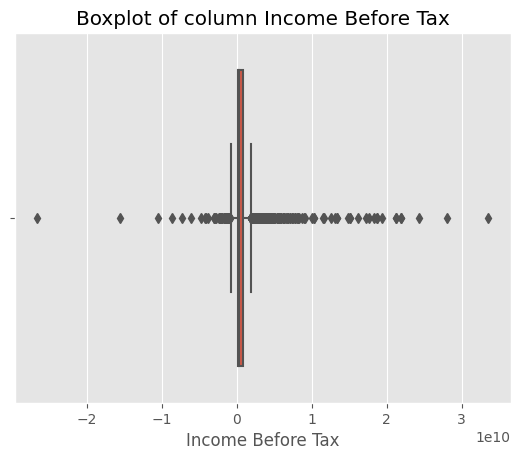

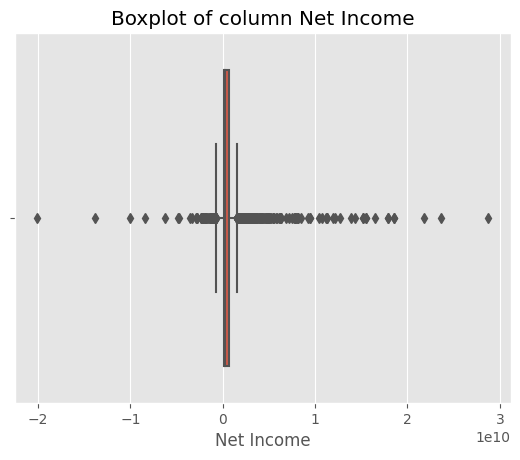

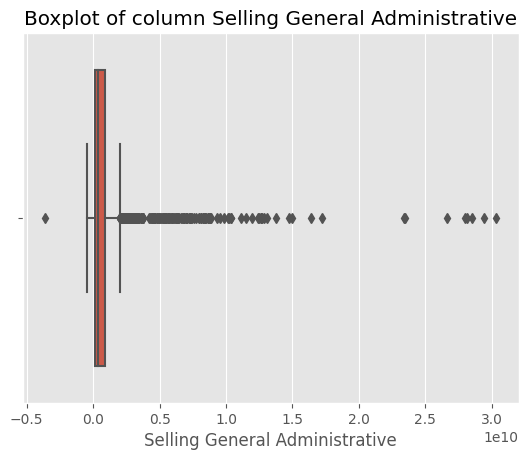

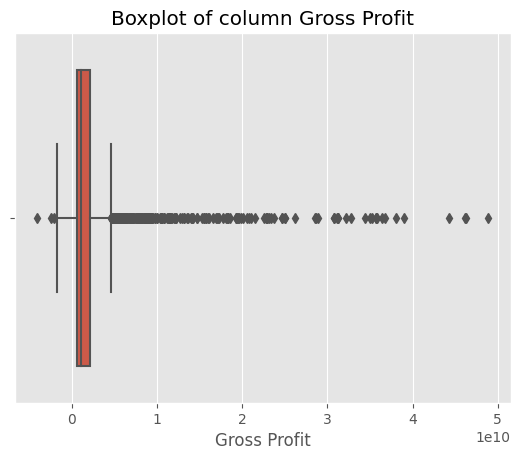

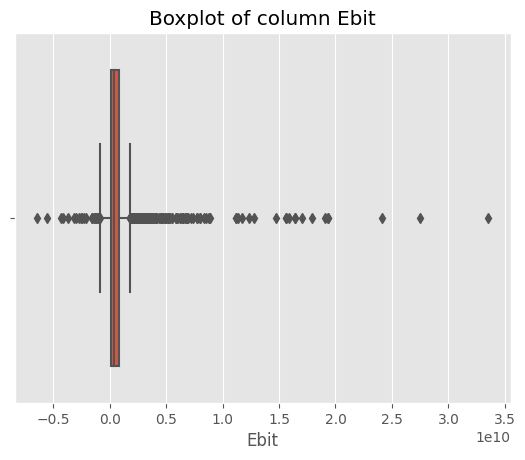

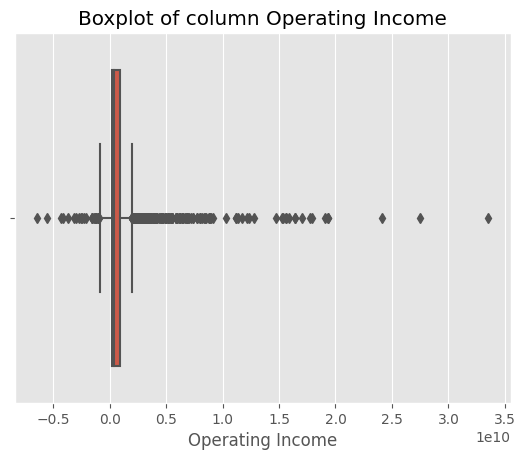

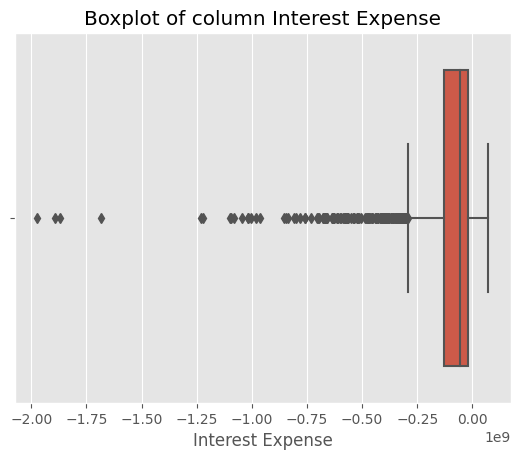

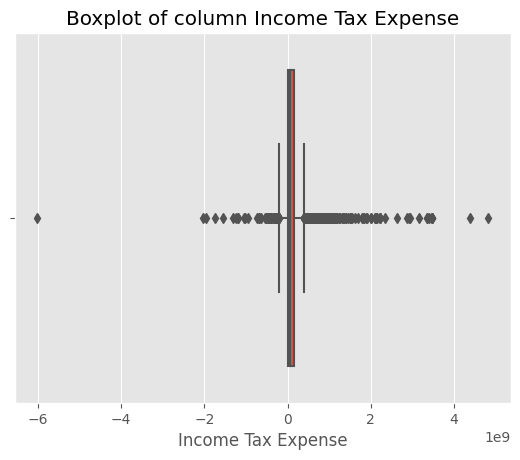

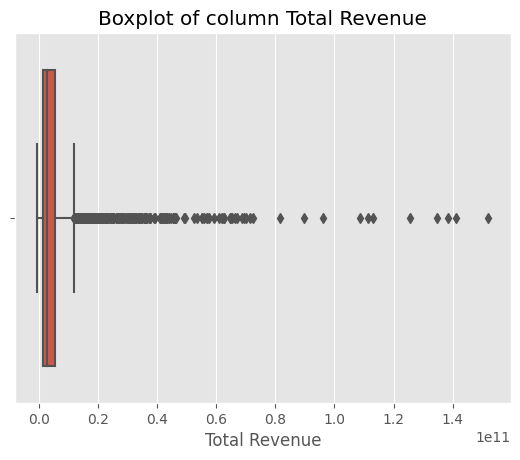

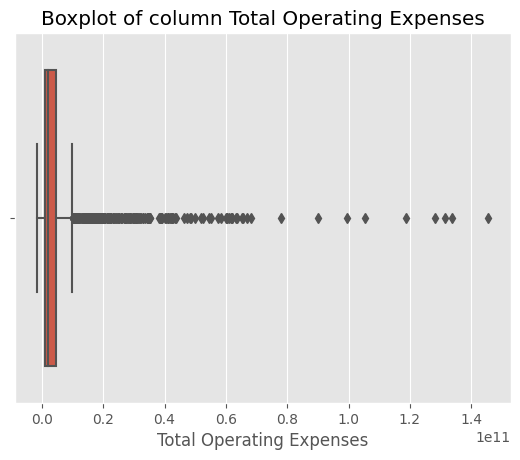

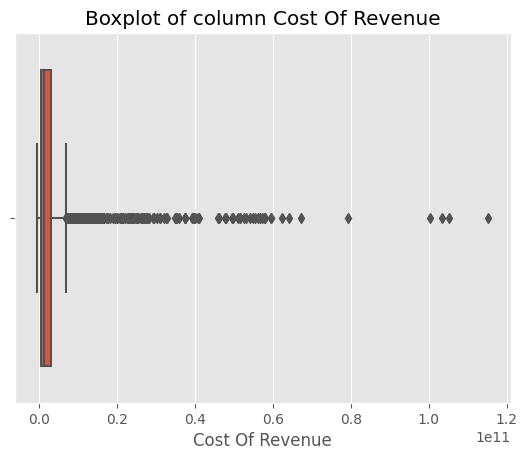

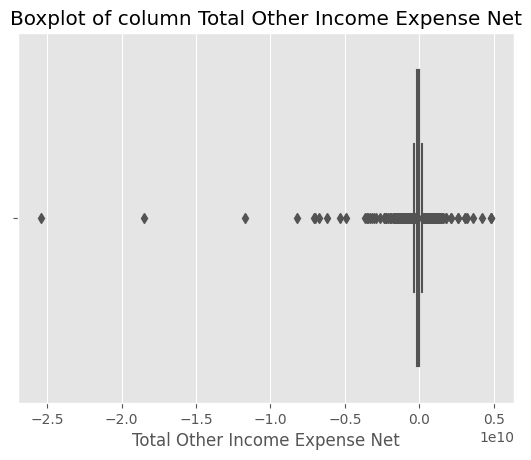

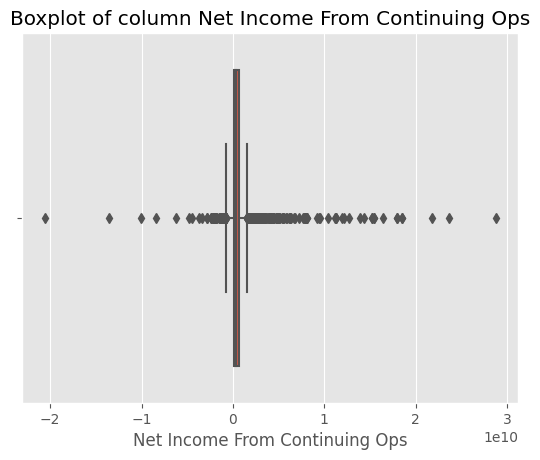

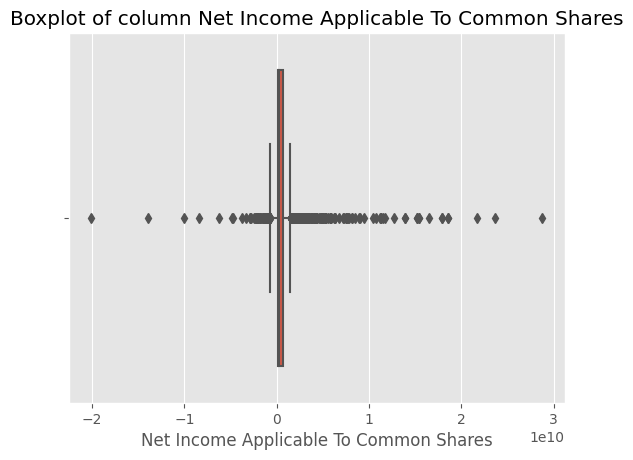

In [ ]:
# checking outliers in columns
plt.style.use("ggplot")
for col in df.columns:
  if df[col].dtype == "float64":
    sns.boxplot(x = df[col])
    plt.title("Boxplot of column {}".format(col))
    plt.show()
  else:
    pass

In [ ]:
# separating the numerical columns for smooth operation
num_col = [col for col in df.columns if df[col].dtype=="float64"]

# IQR Method
- The above boxplots show outliers in all the variables. So, I will use IQR method to remove the outliers.

In [ ]:
df_out = df.copy()
for col_name in num_col:
    q1 = df_out[col_name].quantile(0.25)
    q3 = df_out[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_out.loc[(df_out[col_name] > fence_low) & (df_out[col_name] < fence_high)]


In [ ]:
print("Data Shape Before cleaning {}".format(df.shape))
print("Data Shape After cleaning {}".format(df_out.shape))

Data Shape Before cleaning (2012, 17)
Data Shape After cleaning (891, 17)


In [ ]:
# checking null values
df_out.isna().sum()

date                                      0
firm                                      0
Ticker                                    0
Income Before Tax                         0
Net Income                                0
Selling General Administrative            0
Gross Profit                              0
Ebit                                      0
Operating Income                          0
Interest Expense                          0
Income Tax Expense                        0
Total Revenue                             0
Total Operating Expenses                  0
Cost Of Revenue                           0
Total Other Income Expense Net            0
Net Income From Continuing Ops            0
Net Income Applicable To Common Shares    0
dtype: int64

- No null values found in the cleaned data.

In [ ]:
# checking for duplicates in cleaned data
df_out[df_out.duplicated()]

,date,firm,Ticker,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares


In [ ]:
# dropping the duplicate values
df_out.drop_duplicates(inplace=True)

In [ ]:
# checking for duplicates in cleaned data
df_out[df_out.duplicated()]

,date,firm,Ticker,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares


- No duplicates are found, duplicates are succesfully removed.

In [ ]:
# Dropping the unnecessary columns
col_drop = ['date', 'firm', 'Ticker']

# dropping
df_out.drop(col_drop,axis=1,inplace=True)

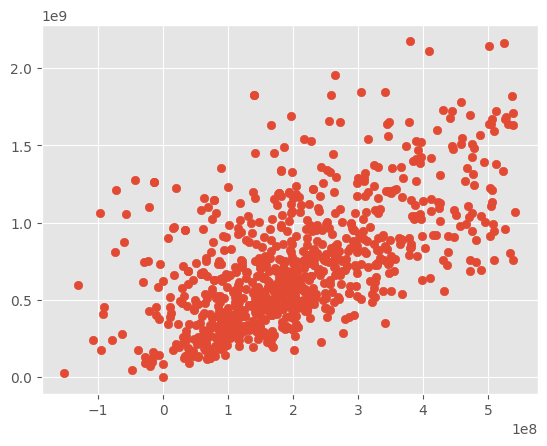

In [ ]:
plt.scatter(df_out['Net Income'], df_out['Gross Profit'])

In [ ]:
# Summary statistics
df_out.describe()

,Income Before Tax,Net Income,Selling General Administrative,Gross Profit,Ebit,Operating Income,Interest Expense,Income Tax Expense,Total Revenue,Total Operating Expenses,Cost Of Revenue,Total Other Income Expense Net,Net Income From Continuing Ops,Net Income Applicable To Common Shares
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.454973e+08,1.983004e+08,2.983624e+08,7.055955e+08,2.865328e+08,2.870028e+08,-4.036057e+07,4.375197e+07,1.714416e+09,1.422147e+09,1.005328e+09,-4.134993e+07,2.015178e+08,1.972745e+08
std,1.657663e+08,1.325882e+08,2.790697e+08,3.949665e+08,1.731561e+08,1.729327e+08,3.782159e+07,4.293200e+07,1.110967e+09,1.005174e+09,8.558779e+08,5.345596e+07,1.337378e+08,1.319803e+08
min,-1.990000e+08,-1.520000e+08,-1.851050e+08,0.000000e+00,-1.590000e+08,-1.590000e+08,-1.810000e+08,-9.200000e+07,0.000000e+00,0.000000e+00,0.000000e+00,-2.020000e+08,-1.733970e+08,-1.520000e+08
25%,1.260500e+08,1.016315e+08,9.585000e+07,4.101775e+08,1.554855e+08,1.556685e+08,-5.595000e+07,1.305000e+07,8.459935e+08,6.550820e+08,3.321205e+08,-7.275000e+07,1.035630e+08,1.010340e+08
50%,2.196000e+08,1.821060e+08,2.191290e+08,6.375000e+08,2.566230e+08,2.566230e+08,-2.870000e+07,3.700000e+07,1.403766e+09,1.121000e+09,7.190000e+08,-3.030000e+07,1.823580e+08,1.820000e+08
75%,3.436000e+08,2.716115e+08,4.039615e+08,9.282650e+08,3.854500e+08,3.861000e+08,-1.268450e+07,6.822450e+07,2.393500e+09,2.038900e+09,1.471338e+09,-6.554500e+06,2.782500e+08,2.715795e+08
max,7.150000e+08,5.420000e+08,1.408000e+09,2.173000e+09,8.150000e+08,8.150000e+08,7.200000e+07,1.890000e+08,5.318000e+09,4.634000e+09,3.545000e+09,1.109650e+08,5.860000e+08,5.420000e+08


In [ ]:
# Correlation matrix
corr_df = df_out.corr()

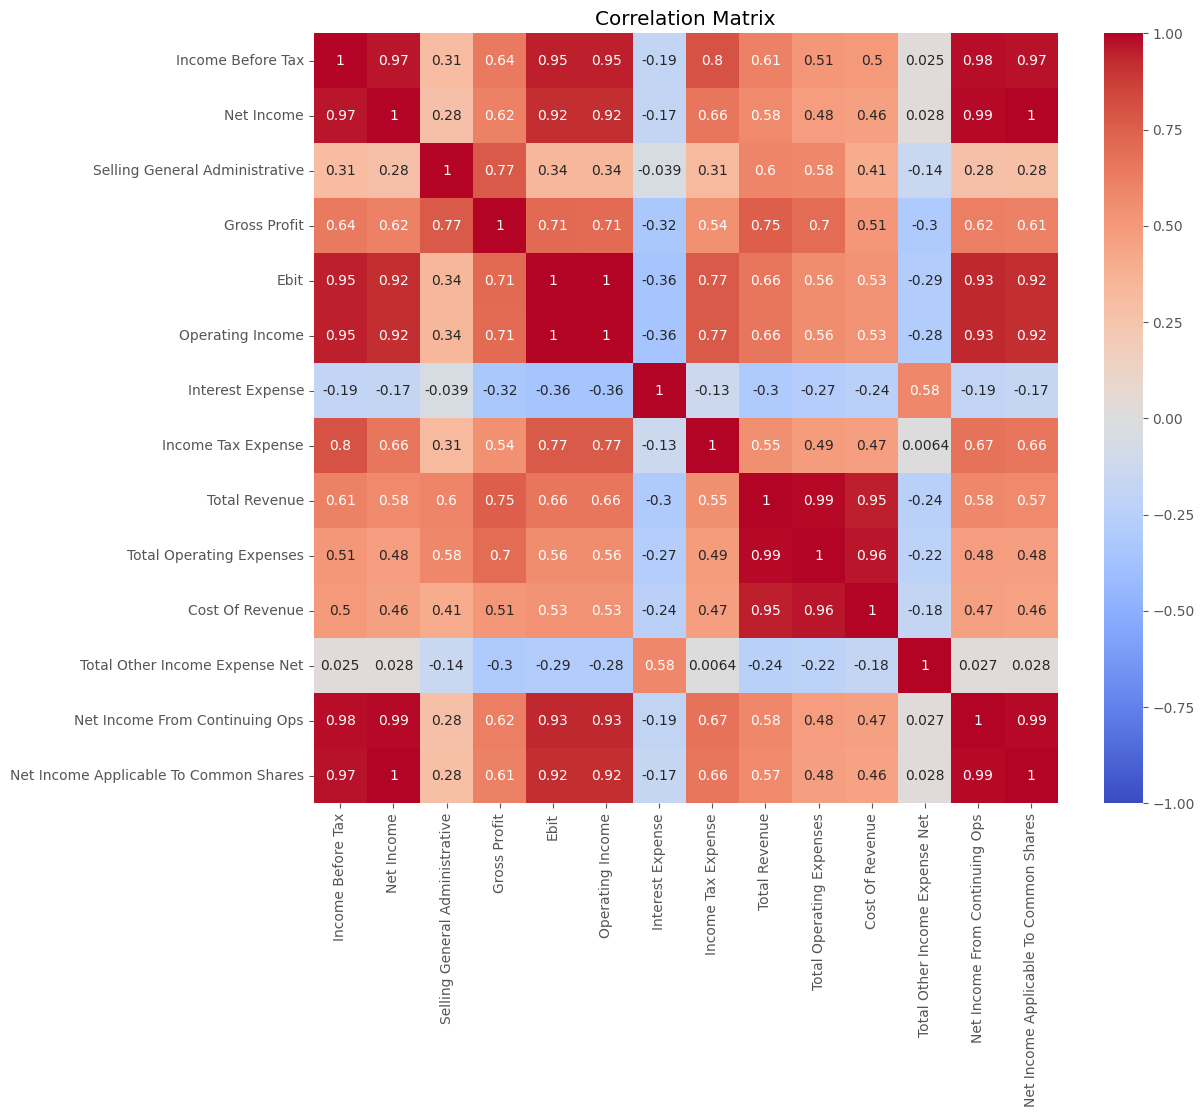

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Data Preparation For Machine Learning

In [ ]:
# separating the target and feature columns
X = df_out.drop("Gross Profit",axis=1)

# target column
y = df_out[["Gross Profit"]]

# Feature Scaling
- As my features are different in scaled, i will scale them for better model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [ ]:
# scaling the features
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [ ]:
# splitting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=21)

# Machine Learning
- I will apply machine learnining models which are Linear Regression, Ridge,Random forest, Gradient Boosting and Lasso Regression.
- I will evaluate the performance of models using RMSE as my metric.

In [ ]:
# initiating the model
linreg = LinearRegression()

# fitting the model on training data
linreg.fit(X_train,y_train)

# getting prediction on the testing data
y_pred_linreg = linreg.predict(X_test)

# computing RMSE
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test,y_pred_linreg))

# computing R2 score
coef_deter_lr = metrics.r2_score(y_test,y_pred_linreg)

# computing MAE
mae_lr = metrics.mean_absolute_error(y_test,y_pred_linreg)

print("RMSE of Linear Regression on testing set is {}".format(rmse_lr))
print("-"*100)
print("R2 score of Linear Regression on testing set is {}".format(coef_deter_lr))
print("-"*100)
print("MAE of Linear Regression on testing set is {}".format(mae_lr))
print("-"*100)

RMSE of Linear Regression on testing set is 360574.2793037128
----------------------------------------------------------------------------------------------------
R2 score of Linear Regression on testing set is 0.9999992114590702
----------------------------------------------------------------------------------------------------
MAE of Linear Regression on testing set is 26950.58698971611
----------------------------------------------------------------------------------------------------


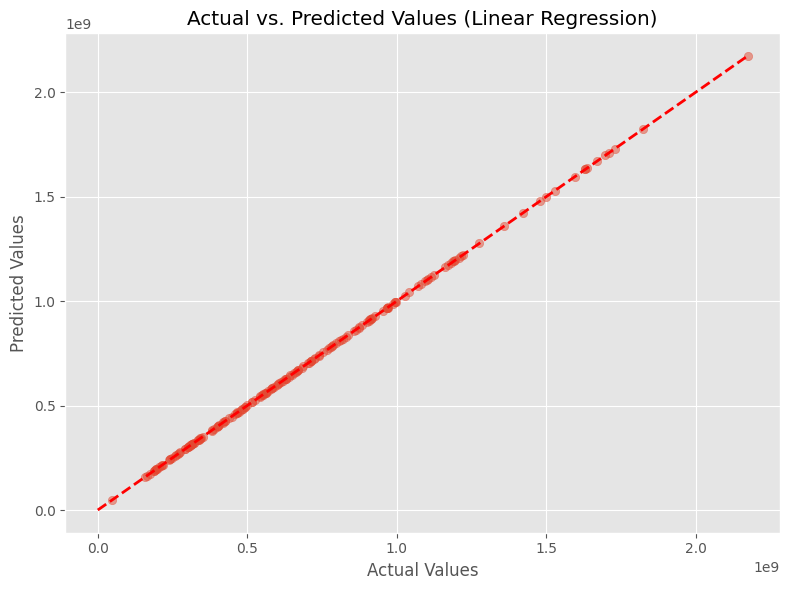

In [ ]:
# Extract the values from the "Gross Profit" column
x_values = df_out['Gross Profit'].values
# Create a scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred_linreg, alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(x_values), max(x_values)], [min(x_values), max(x_values)], linestyle='--', color='red', linewidth=2)
# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
# Add a grid for better readability
plt.grid(True)
# Ensure a tight layout
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
# initiating the model
ridge = Ridge()

# fitting the model on training data
ridge.fit(X_train,y_train)

# getting prediction on the testing data
y_pred_ridge = ridge.predict(X_test)

# computing RMSE
rmse_ridge = np.sqrt(metrics.mean_squared_error(y_test,y_pred_ridge))

# computing R2 score
coef_deter_ridge = metrics.r2_score(y_test,y_pred_ridge)

# computing MAE
mae_ridge = metrics.mean_absolute_error(y_test,y_pred_ridge)

print("RMSE of Ridge Regression on testing set is {}".format(rmse_ridge))
print("-"*100)
print("R2 score of Ridge Regression on testing set is {}".format(coef_deter_ridge))
print("-"*100)
print("MAE of Ridge Regression on testing set is {}".format(mae_ridge))
print("-"*100)

RMSE of Ridge Regression on testing set is 16938757.147670016
----------------------------------------------------------------------------------------------------
R2 score of Ridge Regression on testing set is 0.9982598053247571
----------------------------------------------------------------------------------------------------
MAE of Ridge Regression on testing set is 10533107.898877306
----------------------------------------------------------------------------------------------------


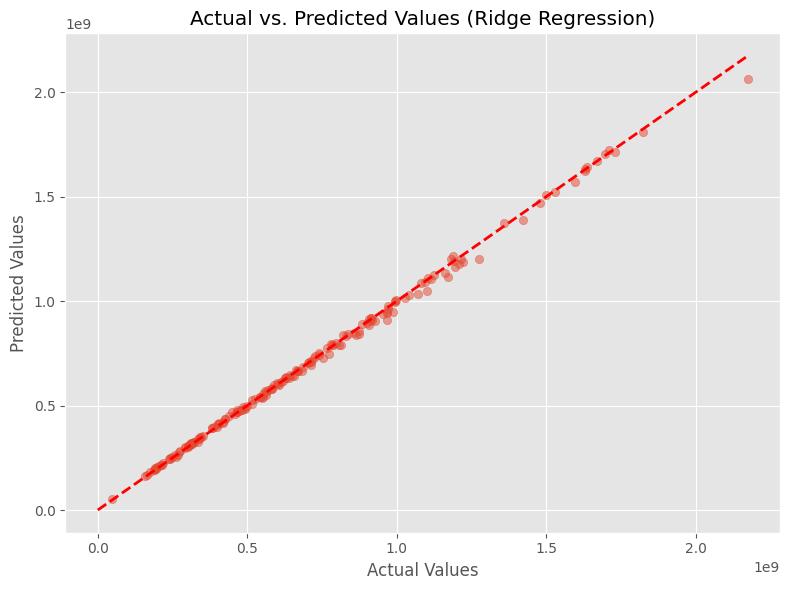

In [ ]:


# Create a scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred_ridge, alpha=0.5)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(x_values), max(x_values)], [min(x_values), max(x_values)], linestyle='--', color='red', linewidth=2)

# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Ridge Regression)')

# Add a grid for better readability
plt.grid(True)

# Ensure a tight layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
# initiating the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# fitting the model on training data
rf_model.fit(X_train,y_train)

# getting prediction on the testing data
y_pred_rf = rf_model.predict(X_test)

# computing RMSE
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test,y_pred_rf))

# computing R2 score
coef_deter_rf = metrics.r2_score(y_test,y_pred_rf)

# computing MAE
mae_rf = metrics.mean_absolute_error(y_test,y_pred_rf)

print("RMSE of RandomForestRegressor on testing set is {}".format(rmse_rf))
print("-"*100)
print("R2 score of RandomForestRegressor on testing set is {}".format(coef_deter_rf))
print("-"*100)
print("MAE of RandomForestRegressor on testing set is {}".format(mae_rf))
print("-"*100)

<ipython-input-31-669aef17544e>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RMSE of RandomForestRegressor on testing set is 157332031.4725428
----------------------------------------------------------------------------------------------------
R2 score of RandomForestRegressor on testing set is 0.8498694578340281
----------------------------------------------------------------------------------------------------
MAE of RandomForestRegressor on testing set is 86019654.02234636
----------------------------------------------------------------------------------------------------


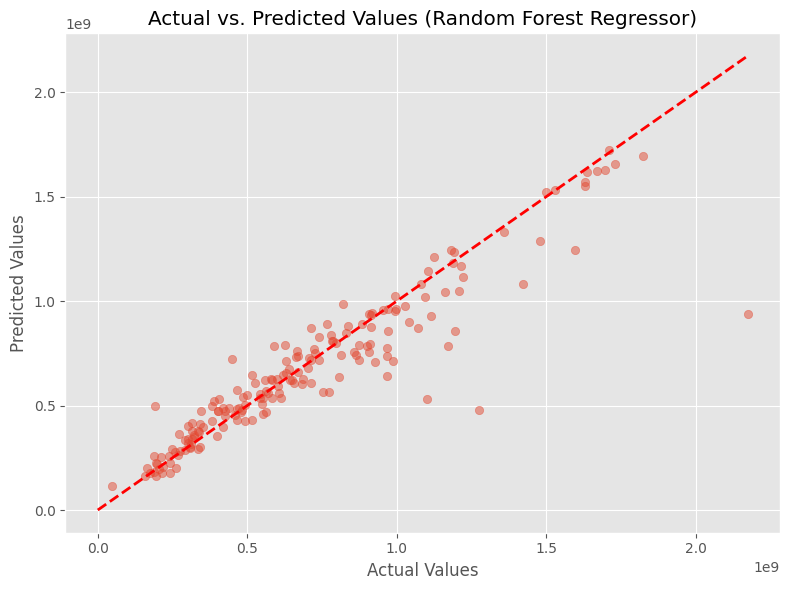

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred_rf, alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(x_values), max(x_values)], [min(x_values), max(x_values)], linestyle='--', color='red', linewidth=2)
# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Random Forest Regressor)')
# Add a grid for better readability
plt.grid(True)
# Ensure a tight layout
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
# fitting the model on training data
gb_model.fit(X_train,y_train)

# getting prediction on the testing data
y_pred_gb = gb_model.predict(X_test)

# computing RMSE
rmse_gb = np.sqrt(metrics.mean_squared_error(y_test,y_pred_gb))

# computing R2 score
coef_deter_gb = metrics.r2_score(y_test,y_pred_gb)

# computing MAE
mae_gb = metrics.mean_absolute_error(y_test,y_pred_gb)

print("RMSE of Gradient Boosting Regressor on testing set is {}".format(rmse_gb))
print("-"*100)
print("R2 score of Gradient Boosting Regressor on testing set is {}".format(coef_deter_gb))
print("-"*100)
print("MAE of Gradient Boosting Regressor on testing set is {}".format(mae_gb))
print("-"*100)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE of Gradient Boosting Regressor on testing set is 150400814.77819535
----------------------------------------------------------------------------------------------------
R2 score of Gradient Boosting Regressor on testing set is 0.8628059962545231
----------------------------------------------------------------------------------------------------
MAE of Gradient Boosting Regressor on testing set is 87594771.3080632
----------------------------------------------------------------------------------------------------


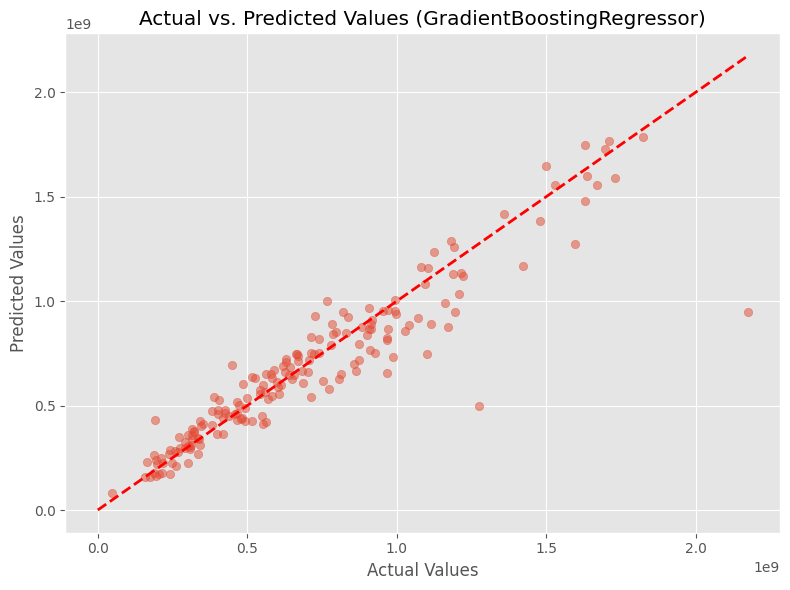

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred_gb, alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(x_values), max(x_values)], [min(x_values), max(x_values)], linestyle='--', color='red', linewidth=2)
# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (GradientBoostingRegressor)')
# Add a grid for better readability
plt.grid(True)
# Ensure a tight layout
plt.tight_layout()
# Display the plot
plt.show()

In [ ]:
# initiating the model
lasso = Lasso()

# fitting the model on training data
lasso.fit(X_train,y_train)

# getting prediction on the testing data
y_pred_lasso = lasso.predict(X_test)

# computing RMSE
rmse_lasso = np.sqrt(metrics.mean_squared_error(y_test,y_pred_lasso))

# computing R2 score
coef_deter_lasso = metrics.r2_score(y_test,y_pred_lasso)

# computing MAE
mae_lasso = metrics.mean_absolute_error(y_test,y_pred_lasso)

print("RMSE of Lasso Regression on testing set is {}".format(rmse_lasso))
print("-"*100)
print("R2 score of Lasso Regression on testing set is {}".format(coef_deter_lasso))
print("-"*100)
print("MAE of Lasso Regression on testing set is {}".format(mae_lasso))
print("-"*100)

RMSE of Lasso Regression on testing set is 4340029.00200964
----------------------------------------------------------------------------------------------------
R2 score of Lasso Regression on testing set is 0.9998857595209231
----------------------------------------------------------------------------------------------------
MAE of Lasso Regression on testing set is 1663527.7401884887
----------------------------------------------------------------------------------------------------


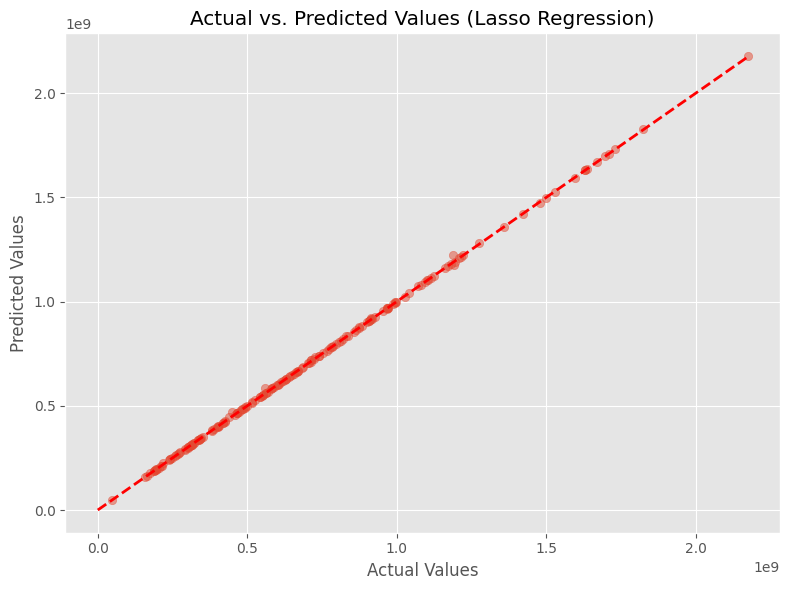

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
# Scatter plot of actual vs. predicted
plt.scatter(y_test, y_pred_lasso, alpha=0.5)
# Add a diagonal line for reference (perfect predictions)
plt.plot([min(x_values), max(x_values)], [min(x_values), max(x_values)], linestyle='--', color='red', linewidth=2)
# Label the axes and add a title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Lasso Regression)')
# Add a grid for better readability
plt.grid(True)
# Ensure a tight layout
plt.tight_layout()
# Display the plot
plt.show()

# Deep Learning
- I will use deep learning FNN which a type of ANN to predict the gross profit column, than i will compare the performance of machine learning models and deep learning FNN model.

# FNN


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

# Experimentation with simple ANN architecture

In [ ]:
# creating ANN model
ann_model = Sequential()

# first layer
ann_model.add(Dense(20,activation="relu",input_shape=(13,)))

# second layer
ann_model.add(Dense(15,activation="relu"))

# third layer
ann_model.add(Dense(7,activation="relu"))

# output layer
ann_model.add(Dense(1,activation="linear"))

# Compililing the model with three input and one output layer
ann_model.compile(optimizer='adam', loss='mean_squared_error')

# Trainining the ANN model upto 100 epochs
model_history = ann_model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Prediction on test data
ann_predictions = ann_model.predict(X_test)

# Calculating evaluation metrics
fnn_rmse = np.sqrt(mean_squared_error(y_test, ann_predictions))
fnn_r2 = r2_score(y_test, ann_predictions)
fnn_mae = mean_absolute_error(y_test, ann_predictions)

Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 633335808748683264.0000 - val_loss: 725548962752233472.0000
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 633335808748683264.0000 - val_loss: 725548962752233472.0000
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 633335808748683264.0000 - val_loss: 725548962752233472.0000
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 633335808748683264.0000 - val_loss: 725548962752233472.0000
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - lo

In [ ]:
print(f'ANN RMSE: {fnn_rmse:.2f}')
print(f'ANN R2 Score: {fnn_r2:.2f}')
print(f'ANN MAE: {fnn_mae:.2f}')

ANN RMSE: 812407981.56
ANN R2 Score: -3.00
ANN MAE: 703800051.04


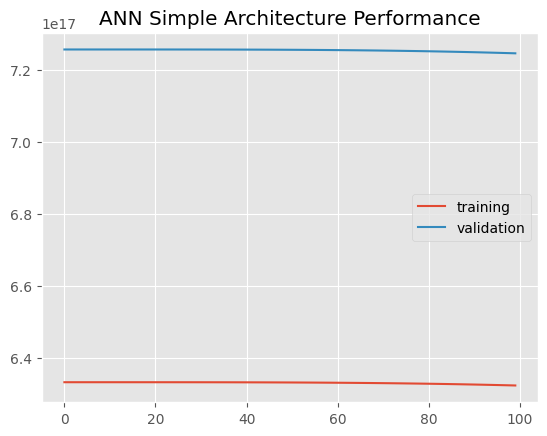

In [ ]:
# plotting training and validation set loss
plt.plot(model_history.history['loss'],label="training")
plt.plot(model_history.history['val_loss'],label="validation")
plt.title("ANN Simple Architecture Performance")
plt.legend()


# Experimentation with complex ANN architecture

In [ ]:
# creating another ANN model
ann_model2 = Sequential()

# first layer
ann_model2.add(Dense(128,activation="relu",input_shape=(13,)))

# second layer
ann_model2.add(Dense(64,activation="relu"))

# third layer
ann_model2.add(Dense(32,activation="relu"))

# fourth layer
ann_model2.add(Dense(16,activation="relu"))

# output layer
ann_model2.add(Dense(1,activation="linear"))

# Compililing the model with three input and one output layer
ann_model2.compile(optimizer='adam', loss='mean_squared_error')

# Trainining the ANN model upto 100 epochs
model_history2 = ann_model2.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

# Prediction on test data
ann_predictions2 = ann_model2.predict(X_test)

# Calculating evaluation metrics
fnn_rmse2 = np.sqrt(mean_squared_error(y_test, ann_predictions2))
fnn_r2_2 = r2_score(y_test, ann_predictions2)
fnn_mae2 = mean_absolute_error(y_test, ann_predictions2)

Epoch 1/100
18/18 [==============================] - 1s 9ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 633335946187636736.0000 - val_loss: 725548962752233472.0000
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 633335808748683264.0000 - val_loss: 725548756593803264.0000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 633335877468160000.0000 - val_loss: 725548550435373056.0000
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 633335396431822848.0000 - val_loss: 725548000679559168.0000
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 633334709237055488.0000 - val_loss: 725546626290024448.0000
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - lo

In [ ]:
print(f'ANN (complex architecture) RMSE : {fnn_rmse2:.2f}')
print(f'ANN (complex architecture) R2 Score: {fnn_r2_2:.2f}')
print(f'ANN (complex architecture) MAE: {fnn_mae2:.2f}')

ANN (complex architecture) RMSE : 389421944.98
ANN (complex architecture) R2 Score: 0.08
ANN (complex architecture) MAE: 327594624.67


- We see some improvement in the metrics by making the architecture complex.

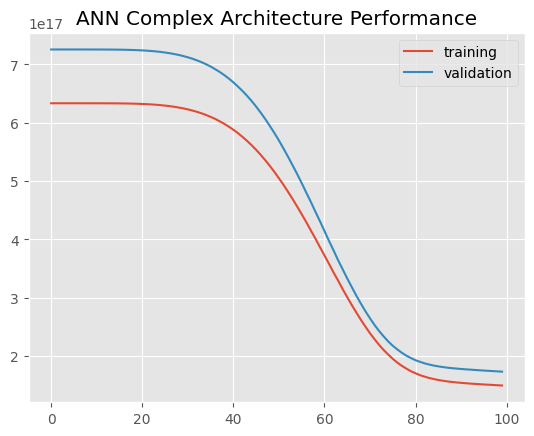

In [ ]:
# plotting training and validation set loss
plt.plot(model_history2.history['loss'],label="training")
plt.plot(model_history2.history['val_loss'],label="validation")
plt.title("ANN Complex Architecture Performance")
plt.legend()



- The above complex architecture is performing good on training and validation set evident from the graph.

- After Experimenting with different values, I came to the conclusion that deep learning model is not a good choice for this data.

- The simple ANN and complex ANN architecture are failing to perform on testing data, they are overfitting and performing poor on the data.

# Reason
- Deep Learning Models are data hungry, to perform well, they need large number of data points, in this case, the dataset is too small. Due to lack of dataset ANN is failing to perform.

# RNN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM
from math import sqrt


In [ ]:
# reshaping data for RNN
X_train_rnn = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
# Building the RNN model
model_rnn = Sequential()
model_rnn.add(LSTM(units=64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
model_rnn.add(Dense(units=1))

# compiling
model_rnn.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=100, validation_split=0.2,verbose=1)

# Making predictions on the test set
y_pred_rnn = model_rnn.predict(X_test_rnn)



Epoch 1/100
18/18 [==============================] - 2s 24ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 633335877468160000.0000 - val_loss: 725548962752233472.0000
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 633335808748683264.0000 - val_loss: 725548962752233472.0000
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 633335808748683264.0000 - val_loss: 725548962752233472.0000
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - l

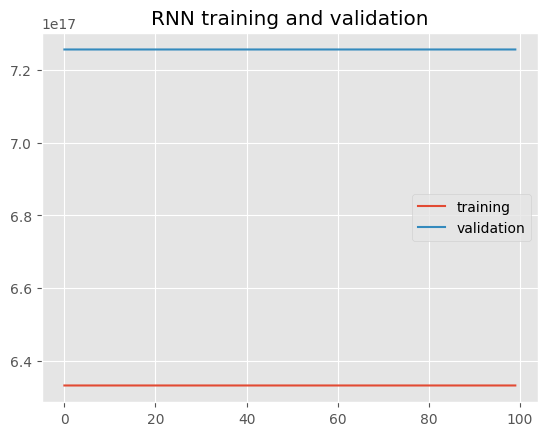

In [ ]:
# plotting training and validation set loss
plt.plot(history_rnn.history['loss'],label="training")
plt.plot(history_rnn.history['val_loss'],label="validation")
plt.title("RNN training and validation")
plt.legend()


In [ ]:
# Evaluating the model performance
rmse_rnn = sqrt(mean_squared_error(y_test, y_pred_rnn))
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

print(f'RMSE RNN: {rmse_rnn}')
print(f'MAE RNN: {mae_rnn}')
print(f'R-squared (R2) RNN: {r2_rnn}')


RMSE RNN: 813004507.2085776
MAE RNN: 704341799.8617193
R-squared (R2) RNN: -3.0088578686582457


# Model Comparison

In [ ]:
# saving rmse of models
rmse_comparison = [rmse_lr,rmse_ridge,rmse_rf,rmse_gb,rmse_lasso,fnn_rmse,fnn_rmse2,rmse_rnn]

# saving names of models
model_names = ["Linear regression","Ridge Regression","Lasso Regression","GradientBoostingRegressor","RandomForestRegressor","FNN(simple architecture)","FNN(complex architecture)","RNN Model"]



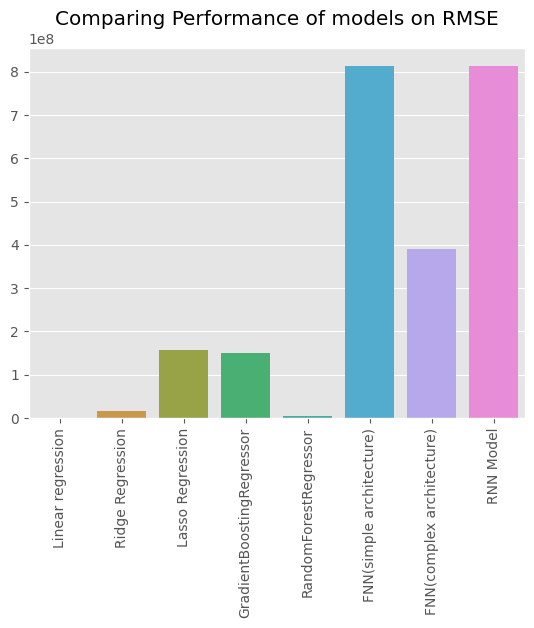

In [ ]:
# making a barlot
sns.barplot(x=model_names,y=rmse_comparison)
plt.title("Comparing Performance of models on RMSE")
plt.xticks(rotation=90)
plt.show()

- The plot shows that the best performer is Linear Regression for this data, as it has the least RMSE.